In [49]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from statistics import mean, mode, median
from matplotlib import cm, colors
from distfit import distfit
from inflection import humanize, underscore
import json


%matplotlib inline

### Script 1 - Gráfico gerado no TCC 1 com os percentis

In [52]:
def resultsFindTCC2(metric:str, root_path:str):
    data = []
    for j in tqdm(range(len(os.listdir(root_path))), desc=metric):
        folder = os.listdir(root_path)[j]
        system_path = os.path.join(root_path, folder)
        metric_path = os.path.join(system_path, metric+'.csv')
        with open(metric_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            for line in csv_reader:
                if(float(line[-1])!= -1 and line[-1] != 'NaN' and line[-1] != 'nan'):
                    data.append(float(line[-1]))
    data = np.sort(data)
    metric_df = pd.DataFrame(data=data, columns=[metric])
    metric_df[metric] = metric_df[metric].apply(pd.to_numeric)
    metric_df_groups  = metric_df.groupby([metric])[metric].count()
    
    x = np.arange(1, 100, 1)
    y = [np.percentile(data, num) for num in x]
    mode_data = mode(data)
    avg_data = mean(data)
    median_data = median(data)
    
    fig,axs = plt.subplots(figsize=(25,15))

    norm = colors.Normalize(vmin=min(y), vmax=max(y)+5, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys_r)
    aux = -1
    for i,value in enumerate(y):
        if aux == -1 or value != aux :
            axs.vlines(value,0, metric_df_groups.max(), linestyles='dashdot', color=mapper.to_rgba(value), label=f"Percentile {x[i]} - {value}"  )
            aux = value
    axs.vlines(mode_data,0, metric_df_groups.max(), linestyles='dotted', color='blue', label=f"Mode - {mode_data}"  )
    axs.vlines(avg_data,0, metric_df_groups.max(), linestyles='dotted', color='red', label=f"Mean - {avg_data}"  )
    axs.vlines(median_data,0, metric_df_groups.max(), linestyles='dotted', color='blue', label=f"Median - {median_data}"  )
    metric_df_groups.plot(ax=axs,title=humanize(underscore(metric)).upper())
    axs.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    axs.set_xlabel('Metric Values')
    axs.set_ylabel('Frequency')
    fig.savefig("./ResultsTCC2/Graphs/Default/"+metric+".png")
    
    fig_log,axs_log = plt.subplots(figsize=(25,15))

    axs_log.set_yscale('log')
    norm = colors.Normalize(vmin=min(y), vmax=max(y)+5, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys_r)
    aux = -1
    for i,value in enumerate(y):
        if aux == -1 or value != aux :
            axs_log.vlines(value,0, metric_df_groups.max(), linestyles='dashdot', color=mapper.to_rgba(value), label=f"Percentile {x[i]} - {value}"  )
            aux = value
    axs_log.vlines(mode_data,0, metric_df_groups.max(), linestyles='dotted', color='blue', label=f"Mode - {mode_data}"  )
    axs_log.vlines(avg_data,0, metric_df_groups.max(), linestyles='dotted', color='red', label=f"Mean - {avg_data}"  )
    axs_log.vlines(median_data,0, metric_df_groups.max(), linestyles='dotted', color='blue', label=f"Median - {median_data}"  )
    metric_df_groups.plot(ax=axs_log,title=humanize(underscore(metric)).upper()+" Log in Y")
    axs_log.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    axs_log.set_xlabel('Metric Values')
    axs_log.set_ylabel('Frequency')
    fig_log.savefig("./ResultsTCC2/Graphs/LogY/"+metric+"_logY.png")

    
    fig_log,axs_log = plt.subplots(figsize=(25,15))
    
    axs_log.set_yscale('log')
    axs_log.set_xscale('log')
    norm = colors.Normalize(vmin=min(y), vmax=max(y)+5, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys_r)
    aux = -1
    for i,value in enumerate(y):
        if aux == -1 or value != aux :
            axs_log.vlines(value,0, metric_df_groups.max(), linestyles='dashdot', color=mapper.to_rgba(value), label=f"Percentile {x[i]} - {value}"  )
            aux = value
    axs_log.vlines(mode_data,0, metric_df_groups.max(), linestyles='dotted', color='blue', label=f"Mode - {mode_data}"  )
    axs_log.vlines(avg_data,0, metric_df_groups.max(), linestyles='dotted', color='red', label=f"Mean - {avg_data}"  )
    axs_log.vlines(median_data,0, metric_df_groups.max(), linestyles='dotted', color='blue', label=f"Median - {median_data}"  )
    metric_df_groups.plot(ax=axs_log,title=humanize(underscore(metric)).upper()+" Log in Axis X and Y")
    axs_log.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    axs_log.set_xlabel('Metric Values')
    axs_log.set_ylabel('Frequency')
    fig_log.savefig("./ResultsTCC2/Graphs/LogXY/"+metric+"_logXY.png")

    
    
    with open("./ResultsTCC2/Graphs/Data/"+metric+".txt", 'w') as result_file:
        print("Average: "+str(np.average(data)), file=result_file)
        print("Standard deviation: "+str(np.std(data)), file=result_file)
        print("Percentile 70: "+str(np.percentile(data, 70)), file=result_file)
        print("Percentile 90: "+str(np.percentile(data,90)), file=result_file)
    
    return data

In [ ]:
project_path = '../../Projetos/'
folder = os.listdir(project_path)
metrics = os.listdir(project_path + f'{folder[0]}/')
for i in range(len(metrics)):
    metric = metrics[i].replace('.csv', '')
    resultsFindTCC2(metric, project_path)
# resultsFindTCC2('cbo',project_path)
# Tempo: 31 minutos e 10.9 segundos

In [2]:
metric = 'lcom'
root_path = './../../Projetos/'
data = []
x = []
for j in tqdm(range(len(os.listdir(root_path)))):
    folder = os.listdir(root_path)[j]
    system_path = os.path.join(root_path, folder)
    metric_path = os.path.join(system_path, metric+'.csv')
    with open(metric_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for line in csv_reader:
            if(float(line[-1])!= -1 and line[-1] != 'NaN' and line[-1] != 'nan'):
                data.append((float(line[-1]), line[-1]))
                x.append(float(line[-1]))
                
x

100%|██████████| 44/44 [01:13<00:00,  1.68s/it]


[0.0,
 0.77777773,
 0.0,
 0.0,
 0.7,
 0.0,
 0.6,
 0.0,
 0.375,
 0.44444445,
 0.9968443,
 0.77777785,
 0.0,
 0.0,
 1.0,
 0.8125,
 0.6,
 0.25,
 0.61666673,
 0.16666667,
 0.0,
 0.33333334,
 0.8588235,
 0.625,
 0.0,
 0.16666667,
 0.6,
 0.33333334,
 0.0,
 0.87,
 0.0,
 0.0,
 0.0,
 0.45454547,
 0.0,
 0.8667763,
 0.16666667,
 0.5,
 0.7395833,
 0.33333334,
 0.33333334,
 0.0,
 0.0,
 0.0,
 0.89285713,
 0.5,
 0.90804315,
 0.5,
 0.75,
 0.0,
 0.9666668,
 0.0,
 0.0,
 0.4166667,
 1.0,
 0.6666667,
 0.6666667,
 0.0,
 0.4,
 0.0,
 0.8068783,
 0.5,
 0.5833334,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5769231,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8409092,
 0.5,
 0.33333334,
 0.5,
 0.5,
 0.0,
 0.75,
 0.0,
 0.0,
 0.70526314,
 0.375,
 0.8163265,
 0.6111111,
 0.63636357,
 0.0,
 0.0,
 0.0,
 0.5,
 0.2,
 0.4,
 0.0,
 0.9,
 0.85714287,
 0.0,
 0.8333333,
 0.0,
 0.0,
 0.8666667,
 0.4,
 0.25,
 0.22222222,
 0.64444447,
 0.0,
 0.6666667,
 0.33333334,
 0.0,
 0.8533333,
 0.2857143,
 0.75,
 0.6666667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [10]:
!pip3 install distfit

You should consider upgrading via the 'c:\users\disan\appdata\local\programs\python\python37-32\python3.exe -m pip install --upgrade pip' command.



  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4


In [15]:
from distfit import distfit
dist = distfit(todf=True)
dist.fit_transform(x)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.01 sec] [RSS: 939.355] [loc=0.232 scale=0.331]
[distfit] >[expon     ] [0.00 sec] [RSS: 818.524] [loc=0.000 scale=0.232]
[distfit] >[pareto    ] [8.14 sec] [RSS: 985.207] [loc=-0.000 scale=0.000]
[distfit] >[dweibull  ] [3.56 sec] [RSS: 909.323] [loc=0.307 scale=0.352]
[distfit] >[t         ] [6.59 sec] [RSS: 986.579] [loc=0.000 scale=0.000]
[distfit] >[genextreme] [28.4 sec] [RSS: 986.931] [loc=0.000 scale=0.000]
[distfit] >[gamma     ] [6.37 sec] [RSS: 419.193] [loc=-0.000 scale=0.211]
[distfit] >[lognorm   ] [15.5 sec] [RSS: 986.931] [loc=-0.000 scale=0.000]
[distfit] >[beta      ] [12.8 sec] [RSS: 665.577] [loc=-0.000 scale=1.059]
[distfit] >[uniform   ] [0.00 sec] [RSS: 936.931] [loc=0.000 scale=1.000]
[distfit] >[loggamma  ] [12.1 sec] [RSS: 939.669] [loc=-97.317 scale=13.247]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.gamma_gen at 0x17acfae40d0>,
  'stats': 'RSS',
  'params': (0.37458332312858394,
   -6.9759507453628545e-28,
   0.21141706348700184),
  'name': 'gamma',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x17af3ab4ee0>,
  'score': 419.1925021483969,
  'loc': -6.9759507453628545e-28,
  'scale': 0.21141706348700184,
  'arg': (0.37458332312858394,),
  'CII_min_alpha': 5.1935110875403134e-05,
  'CII_max_alpha': 0.33654413194818883},
 'summary':          distr    score  LLE          loc        scale  \
 0        gamma  419.193  NaN -6.97595e-28     0.211417   
 1         beta  665.577  NaN -2.81586e-32      1.05907   
 2        expon  818.524  NaN            0     0.232188   
 3     dweibull  909.323  NaN     0.306811     0.352088   
 4      uniform  936.931  NaN            0            1   
 5         norm  939.355  NaN     0.232188     0.331382   
 6     loggamma  939.669  NaN     -97.3169      13.2474   
 7       pareto  985.207

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17af3ad3f70>)

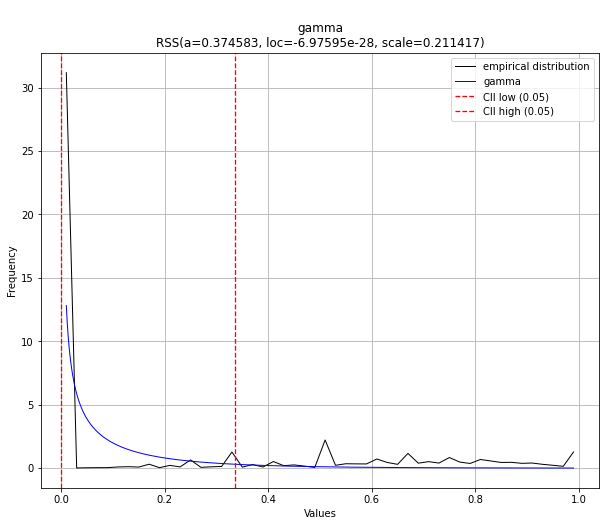

In [16]:
dist.plot()

In [17]:
metric = 'noc'
root_path = './../../Projetos/'
data = []
x = []
for j in tqdm(range(len(os.listdir(root_path)))):
    folder = os.listdir(root_path)[j]
    system_path = os.path.join(root_path, folder)
    metric_path = os.path.join(system_path, metric+'.csv')
    with open(metric_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for line in csv_reader:
            if(float(line[-1])!= -1 and line[-1] != 'NaN' and line[-1] != 'nan'):
                data.append((float(line[-1]), line[-1]))
                x.append(float(line[-1]))

100%|██████████| 44/44 [00:22<00:00,  1.96it/s]


In [21]:
x = np.array(x)

In [56]:
from distfit import distfit
dist = distfit(todf=True, stats='ks')
dist.fit_transform(x)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [ks: 4.85799] [loc=0.230 scale=5.063]
[distfit] >[expon     ] [0.00 sec] [ks: 5.31808] [loc=0.000 scale=0.230]
[distfit] >[pareto    ] [8.38 sec] [ks: 5.31808] [loc=-0.000 scale=0.000]
[distfit] >[dweibull  ] [12.6 sec] [ks: 5.31808] [loc=0.000 scale=0.083]
[distfit] >[t         ] [9.16 sec] [ks: 5.31808] [loc=0.000 scale=0.000]
[distfit] >[genextreme] [34.9 sec] [ks: 5.31808] [loc=-0.000 scale=0.000]
[distfit] >[gamma     ] [5.30 sec] [ks: 5.31808] [loc=-0.000 scale=1.549]
[distfit] >[lognorm   ] [19.6 sec] [ks: 5.31808] [loc=-0.000 scale=0.000]
[distfit] >[beta      ] [12.8 sec] [ks: 5.31808] [loc=-0.000 scale=5160.937]
[distfit] >[uniform   ] [0.00 sec] [ks: 26.7028] [loc=0.000 scale=1032.000]
[distfit] >[loggamma  ] [6.83 sec] [ks: 1.66338] [loc=-60.697 scale=94.478]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.loggamma_gen at 0x17acfafa4c0>,
  'stats': 'ks',
  'params': (2.434902238791976, -60.69698669050244, 94.47815773683249),
  'name': 'loggamma',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x17ac062f6a0>,
  'score': 1.663383374288377,
  'loc': -60.69698669050244,
  'scale': 94.47815773683249,
  'arg': (2.434902238791976,),
  'CII_min_alpha': -118.44163328259935,
  'CII_max_alpha': 99.22704832788655},
 'summary':          distr    score  LLE          loc        scale  \
 0     loggamma  1.66338  NaN      -60.697      94.4782   
 1         norm  4.85799  NaN     0.229951      5.06287   
 2        expon  5.31808  NaN            0     0.229951   
 3       pareto  5.31808  NaN -5.51087e-11  3.60734e-11   
 4     dweibull  5.31808  NaN   4.3341e-29     0.082847   
 5            t  5.31808  NaN  6.75145e-22  8.25905e-22   
 6   genextreme  5.31808  NaN -9.39769e-22  2.09281e-21   
 7        gamma  5.31808  NaN -3.01376e-27      

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17ac0dd52b0>)

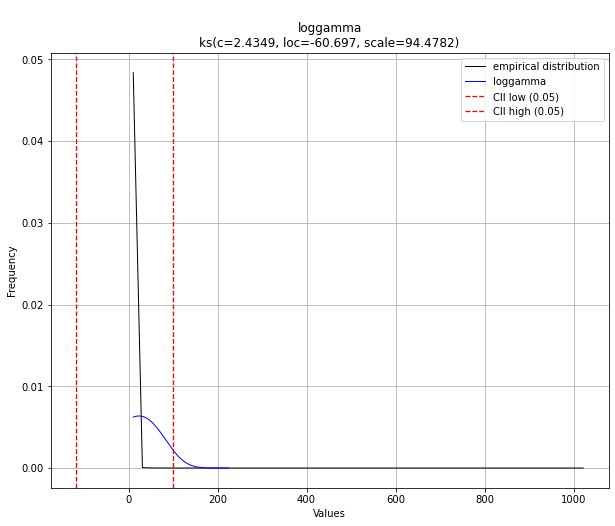

In [57]:
dist.plot()

In [58]:
dist.model

{'distr': <scipy.stats._continuous_distns.loggamma_gen at 0x17acfafa4c0>,
 'stats': 'ks',
 'params': (2.434902238791976, -60.69698669050244, 94.47815773683249),
 'name': 'loggamma',
 'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x17ac062f6a0>,
 'score': 1.663383374288377,
 'loc': -60.69698669050244,
 'scale': 94.47815773683249,
 'arg': (2.434902238791976,),
 'CII_min_alpha': -118.44163328259935,
 'CII_max_alpha': 99.22704832788655}

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17abe706a30>)

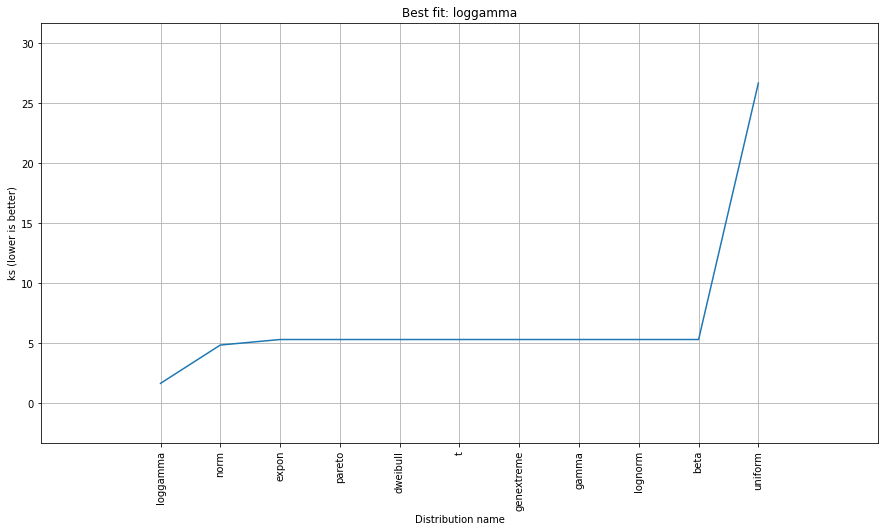

In [59]:
dist.plot_summary()

In [50]:
dist2 = distfit(todf=True,method='percentile', stats='ks')
dist2.fit_transform(x)

[distfit] >fit..
[distfit] >transform..
[distfit] >Compute confidence interval [percentile]


{'model': {'CII_min_alpha': 0.0, 'CII_max_alpha': 2.0},
 'summary': None,
 'histdata': (array([4.83749699e-02, 4.60731244e-05, 1.22727537e-05, 4.82862439e-06,
         3.01789025e-06, 1.60954146e-06, 1.40834878e-06, 1.00596342e-06,
         2.01192683e-07, 8.04770732e-07, 4.02385366e-07, 2.01192683e-07,
         2.01192683e-07, 4.02385366e-07, 2.01192683e-07, 2.01192683e-07,
         0.00000000e+00, 2.01192683e-07, 0.00000000e+00, 0.00000000e+00,
         2.01192683e-07, 2.01192683e-07, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.01192683e-07,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 2.01192683e-07, 2.01192683e-07,
         0.00000000e+00, 0.00000000e+00, 2.01192683e-07, 0.00000000e+00,
         2.01192683e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 2.01192683e-0

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17ac02fc2b0>)

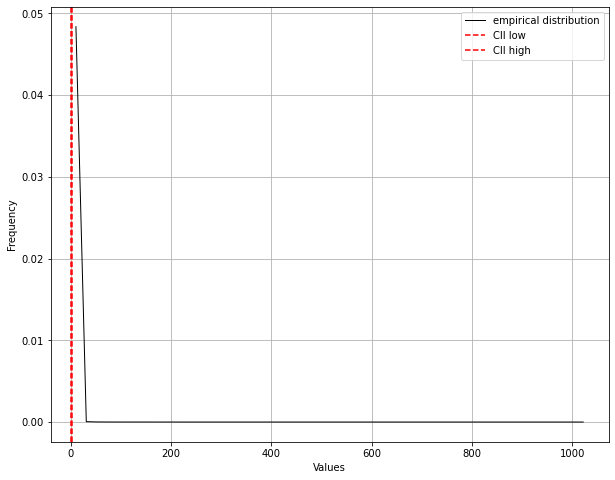

In [51]:
dist2.plot()

### Script 2 - Gráfico de distribuição

In [54]:
import json

def default_json(t):
    return f'{t}'

def results_finds_tcc2_distr(metric: str, root_path: str):
    data = []
    for j in tqdm(range(len(os.listdir(root_path))), desc=metric):
        folder = os.listdir(root_path)[j]
        system_path = os.path.join(root_path, folder)
        metric_path = os.path.join(system_path, metric+'.csv')
        with open(metric_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            for line in csv_reader:
                if(float(line[-1])!= -1 and line[-1] != 'NaN' and line[-1] != 'nan'):
                    data.append(float(line[-1]))
    data = np.sort(data)
    
    dist = distfit(todf=True, stats='ks')
    model = dist.fit_transform(data)
    with open("./ResultsTCC2/Distributions/Model/"+metric+".json", 'w') as result_file:
        json.dump(model, result_file, skipkeys=True,default= default_json)
    
    with open("./ResultsTCC2/Distributions/Model/"+metric+"_model.json", 'w') as result_file:
        json.dump(dist.model,result_file, skipkeys=True, default= default_json)
        
    dist.save("./ResultsTCC2/Distributions/Model/"+metric+".p", overwrite=True)
    
    fig,axs = dist.plot_summary(figsize=(25,15))
    axs.set_title(f"{humanize(underscore(metric)).upper()} - Best fit: {dist.model['name']}")
    fig.savefig("./ResultsTCC2/Distributions/DistributionsGraphs/Summary/"+metric+"_summary.png")

    
    fig,axs = dist.plot(title=humanize(underscore(metric)).upper(),figsize=(25,15))
    axs.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    fig.savefig("./ResultsTCC2/Distributions/DistributionsGraphs/Default/"+metric+".png")    

In [ ]:
project_path = '../../Projetos/'
folder = os.listdir(project_path)
metrics = os.listdir(project_path + f'{folder[0]}/')
for i in range(len(metrics)):
     metric = metrics[i].replace('.csv', '')
     results_finds_tcc2_distr(metric, project_path)
#results_finds_tcc2_distr('cbo',project_path)
#Tempo 131 minutos 30 segundos